# Student Performance Indicator

### ML Project Life Cycle

* Understand the problem statement
* Data Collection
* Data Checks to Perform
* Exploratory Data Analysis
* Data PreProcessing
* Model Training
* Choose best model

#### Problem Statement

This Project is done to find how student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch, and Test preparation score.

#### Data Collection

Taken from https://www.kaggle.com/datasets/spscientist/students-performance-in-exam

##### Import libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing data
data = pd.read_csv(r'C:\mlproject\notebooks\data\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# how's the dimensions of data
data.shape

(1000, 8)

In [7]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Data Checks

* check missing
* check duplicates
* check datatypes
* check no.of unique values
* check statistics of data
* check various categories present in different categorical column

In [12]:
# missing values
data.isna().count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

There are no missing values

In [13]:
# check duplicates
data.duplicated().sum()

0

No duplicates in data

In [15]:
# unique values
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
# statistics of data
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* values seem to be very close, so the data for the subjects must be close.

In [18]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [25]:
# categories in columns
for i in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    print(f'Categories in {i}', end = '    ')
    print(data[i].unique(), end = ' ')
    print()

Categories in gender    ['female' 'male'] 
Categories in race/ethnicity    ['group B' 'group C' 'group A' 'group D' 'group E'] 
Categories in parental level of education    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
Categories in lunch    ['standard' 'free/reduced'] 
Categories in test preparation course    ['none' 'completed'] 


In [26]:
num_cols = []
cat_cols = []
for i in data.columns:
    if data[i].dtype == 'object':
        cat_cols.append(i)
    else:
        num_cols.append(i)
print(f'Numerical columns are {num_cols}')
print(f'Categorical columns are {cat_cols}')

Numerical columns are ['math score', 'reading score', 'writing score']
Categorical columns are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


##### Adding total score and average score in the dataframe

In [32]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']
data['average_score'] = data['total_score'] / 3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [45]:
print(f'Students with perfect score in math score: {data[data["math score"] == 100].shape[0]}')
print(f'Students with perfect score in writing score: {data[data["writing score"] == 100].shape[0]}')
print(f'Students with perfect score in reading score: {data[data["reading score"] == 100].shape[0]}')

Students with perfect score in math score: 7
Students with perfect score in writing score: 14
Students with perfect score in reading score: 17


In [46]:
print(f'Students with perfect score in math score: {data[data["math score"] <= 20].shape[0]}')
print(f'Students with perfect score in writing score: {data[data["writing score"] <= 20].shape[0]}')
print(f'Students with perfect score in reading score: {data[data["reading score"] < 20].shape[0]}')

Students with perfect score in math score: 4
Students with perfect score in writing score: 3
Students with perfect score in reading score: 1


* In maths, students didn't got full marks as compared to other subjects
* Students performed well in reading

#### Exploring Data with some visualizations

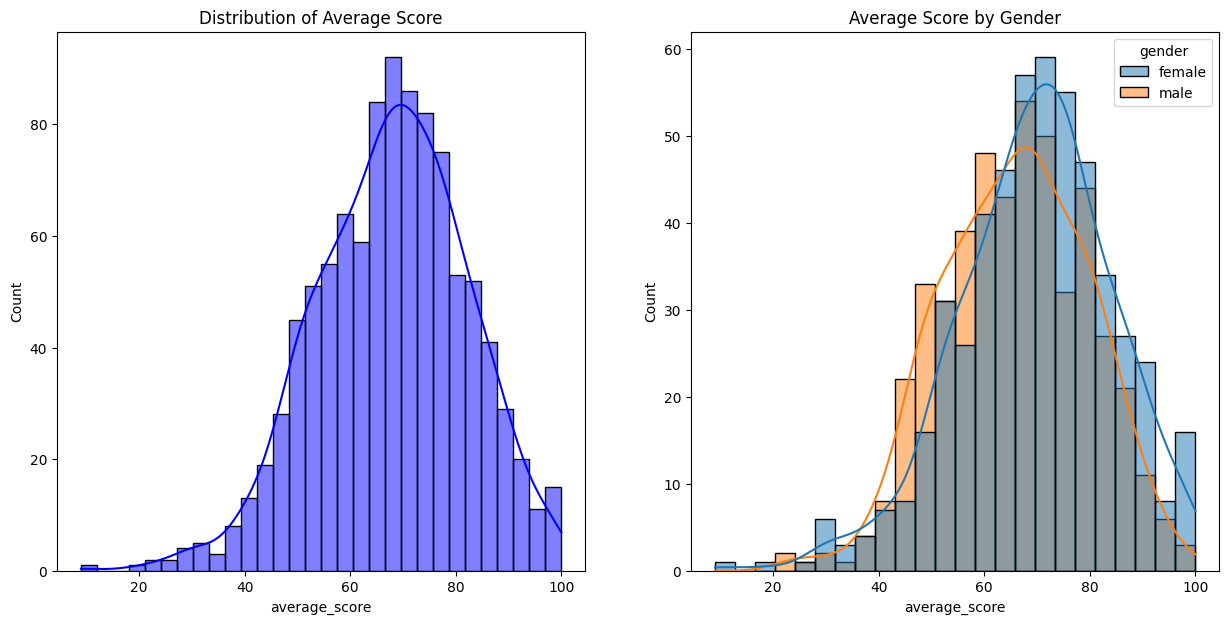

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=data, x='average_score', bins=30, kde=True, color='b', ax=axes[0])
axes[0].set_title('Distribution of Average Score')

sns.histplot(data=data, x='average_score', kde=True, hue='gender', ax=axes[1])
axes[1].set_title('Average Score by Gender')

plt.show()


Girls have scored the high scores more than boys

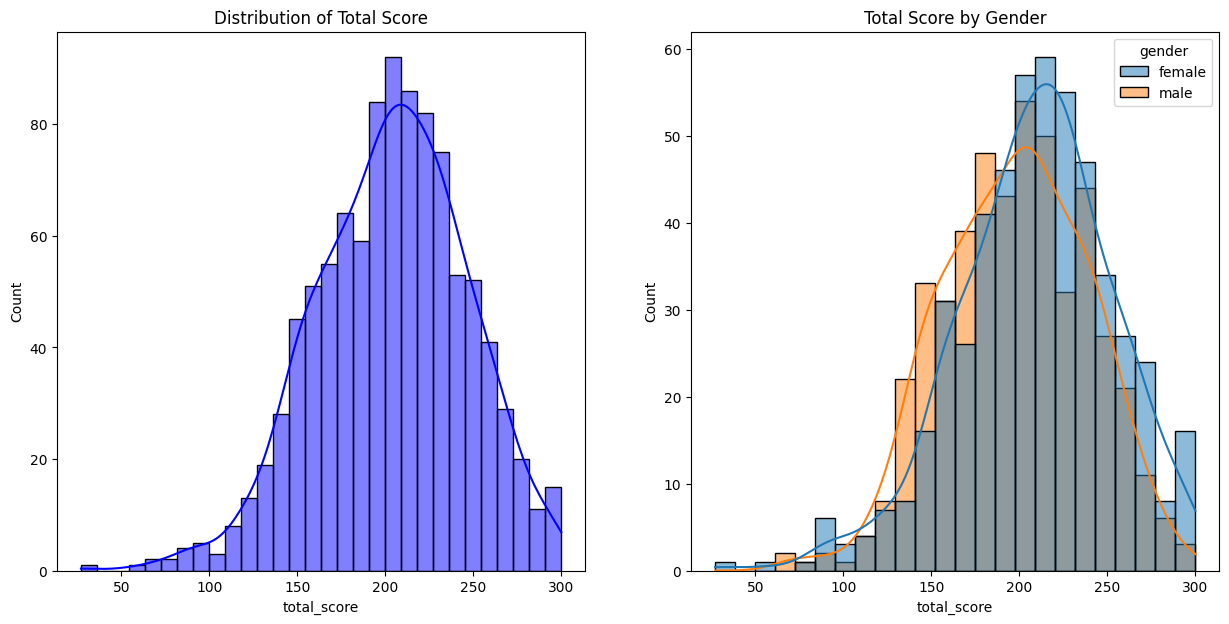

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=data, x='total_score', bins=30, kde=True, color='b', ax=axes[0])
axes[0].set_title('Distribution of Total Score')

sns.histplot(data=data, x='total_score', kde=True, hue='gender', ax=axes[1])
axes[1].set_title('Total Score by Gender')

plt.show()
